In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/president_polls.csv')
df.head()

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
0,88168,1515,Data for Progress,NaN,NaN,Data for Progress,522,Data for Progress,2.6,-1.2,...,11/5/24,general,False,False,NaN,DEM,Harris,16661,Kamala Harris,50.0
1,88168,1515,Data for Progress,NaN,NaN,Data for Progress,522,Data for Progress,2.6,-1.2,...,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,46.0
2,88170,568,YouGov,1213,Yahoo News,YouGov,391,YouGov,3.0,-1.1,...,11/5/24,general,False,False,NaN,DEM,Harris,16661,Kamala Harris,50.0
3,88170,568,YouGov,1213,Yahoo News,YouGov,391,YouGov,3.0,-1.1,...,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,45.0
4,88170,568,YouGov,1213,Yahoo News,YouGov,391,YouGov,3.0,-1.1,...,11/5/24,general,False,False,NaN,DEM,Harris,16661,Kamala Harris,50.0


In [3]:
df.columns

Index(['poll_id', 'pollster_id', 'pollster', 'sponsor_ids', 'sponsors',
       'display_name', 'pollster_rating_id', 'pollster_rating_name',
       'numeric_grade', 'pollscore', 'methodology', 'transparency_score',
       'state', 'start_date', 'end_date', 'sponsor_candidate_id',
       'sponsor_candidate', 'sponsor_candidate_party', 'endorsed_candidate_id',
       'endorsed_candidate_name', 'endorsed_candidate_party', 'question_id',
       'sample_size', 'population', 'subpopulation', 'population_full',
       'tracking', 'created_at', 'notes', 'url', 'url_article', 'url_topline',
       'url_crosstab', 'source', 'internal', 'partisan', 'race_id', 'cycle',
       'office_type', 'seat_number', 'seat_name', 'election_date', 'stage',
       'nationwide_batch', 'ranked_choice_reallocated', 'ranked_choice_round',
       'party', 'answer', 'candidate_id', 'candidate_name', 'pct'],
      dtype='object')

In [4]:
cols_to_keep = ['poll_id', 'pollster', 'pollscore', 'start_date','end_date', 'election_date', 'candidate_name', 'pct']
df = df[cols_to_keep]

In [5]:
df = df.sort_values(by='start_date', ascending=False)
df.shape

(13626, 8)

In [6]:
df = df.dropna(subset=['pct'])
df.shape

(13626, 8)

In [7]:
df.head()

,poll_id,pollster,pollscore,start_date,end_date,election_date,candidate_name,pct
82,88164,RMG Research,-0.4,9/9/24,9/12/24,11/5/24,Donald Trump,47.0
81,88164,RMG Research,-0.4,9/9/24,9/12/24,11/5/24,Kamala Harris,51.0
10281,84158,Beacon/Shaw,-1.1,9/9/23,9/12/23,11/5/24,Vivek G. Ramaswamy,45.0
10275,84158,Beacon/Shaw,-1.1,9/9/23,9/12/23,11/5/24,Ron DeSantis,44.0
10276,84158,Beacon/Shaw,-1.1,9/9/23,9/12/23,11/5/24,Joe Biden,44.0


In [20]:
kamala_by_start_date = df.loc[df['candidate_name'] == "Kamala Harris", ['start_date', 'pct']].groupby('start_date').mean()
kamala_by_start_date = kamala_by_start_date.reset_index()
kamala_by_start_date['start_date'] = pd.to_datetime(kamala_by_start_date['start_date'])
kamala_by_start_date = kamala_by_start_date.sort_values(by='start_date', ascending=True)
kamala_by_start_date = kamala_by_start_date[kamala_by_start_date['start_date'] > '2024-06-01']
kamala_by_start_date.tail(20)

/var/folders/mz/tt_q8j_x6_x4zr1h5x7js65h0000gn/T/ipykernel_24425/2678679029.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  kamala_by_start_date['start_date'] = pd.to_datetime(kamala_by_start_date['start_date'])


,start_date,pct
149,2024-08-23,48.556410
150,2024-08-24,48.211111
151,2024-08-25,47.648000
152,2024-08-26,46.485714
153,2024-08-27,48.200000
155,2024-08-28,47.975000
156,2024-08-29,46.975000
158,2024-08-30,49.068824
159,2024-08-31,47.650000
167,2024-09-01,48.461538


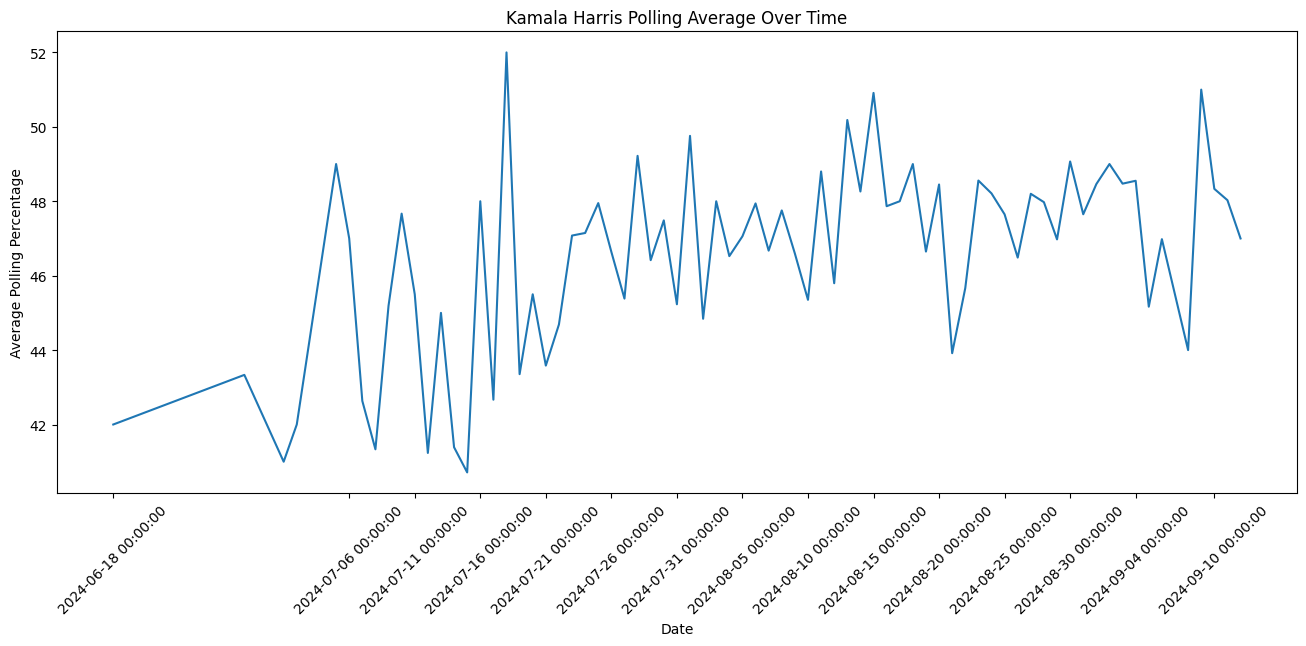

In [21]:
plt.figure(figsize=(16, 6))
plt.plot(kamala_by_start_date['start_date'], kamala_by_start_date['pct'])  
plt.title('Kamala Harris Polling Average Over Time')
plt.xlabel('Date')
plt.ylabel('Average Polling Percentage')

xticks = kamala_by_start_date['start_date'].to_list()[::5]  
plt.xticks(ticks=xticks, labels=xticks, rotation=45)

plt.show()

/var/folders/mz/tt_q8j_x6_x4zr1h5x7js65h0000gn/T/ipykernel_24425/372326483.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trump_by_start_date['start_date'] = pd.to_datetime(trump_by_start_date['start_date'])


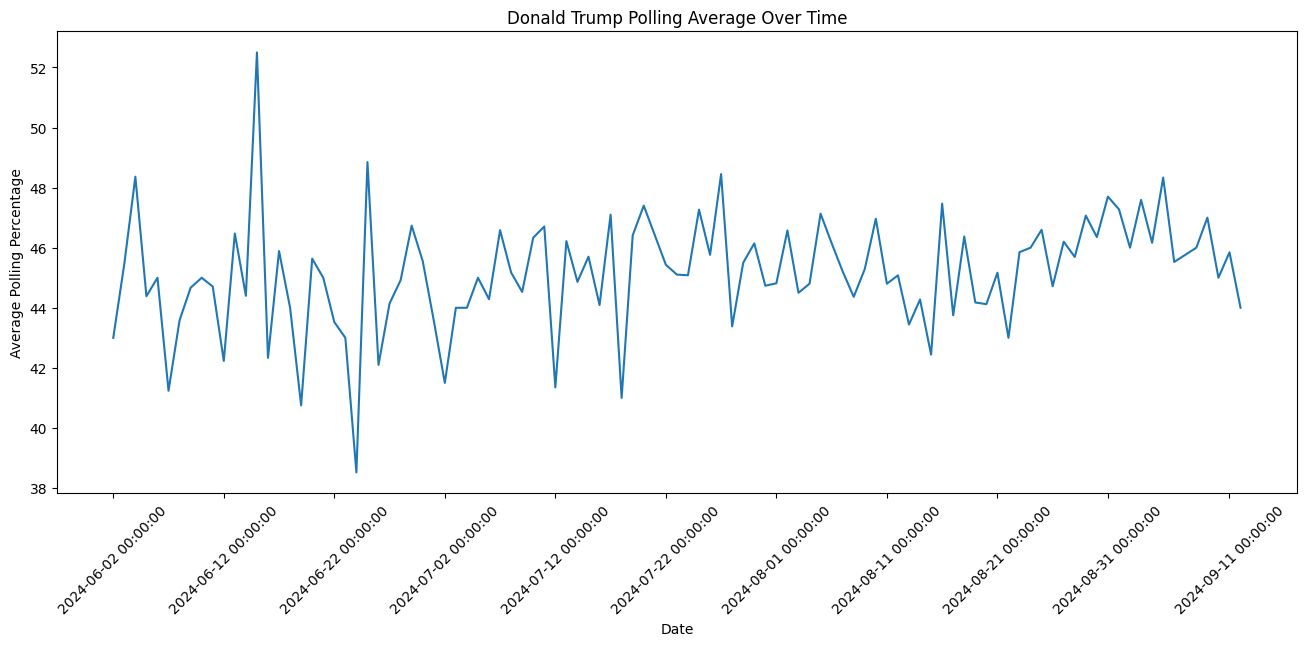

In [26]:
trump_by_start_date = df.loc[df['candidate_name'] == "Donald Trump", ['start_date', 'pct']].groupby('start_date').mean()

trump_by_start_date = trump_by_start_date.reset_index()
trump_by_start_date['start_date'] = pd.to_datetime(trump_by_start_date['start_date'])
trump_by_start_date = trump_by_start_date.sort_values(by='start_date', ascending=True)
trump_by_start_date = trump_by_start_date[trump_by_start_date['start_date'] > '2024-06-01']


plt.figure(figsize=(16, 6))
plt.plot(trump_by_start_date['start_date'], trump_by_start_date['pct'])
plt.title('Donald Trump Polling Average Over Time')
plt.xlabel('Date')
plt.ylabel('Average Polling Percentage')

xticks = trump_by_start_date['start_date'].to_list()[::10]  # Show every 10th tick
plt.xticks(ticks=xticks, labels=xticks, rotation=45)

plt.show()

In [24]:
trump_by_start_date.head()

,start_date,pct
572,2024-06-02,43.000000
598,2024-06-03,45.463636
602,2024-06-04,48.362500
604,2024-06-05,44.383333
607,2024-06-06,45.000000


In [ ]:
trump_by_start_date = trump_by_start_date.reset_index()
trump_by_start_date['start_date'] = pd.to_datetime(trump_by_start_date['start_date'])
trump_by_start_date = trump_by_start_date.loc[trump_by_start_date['start_date'] > '2024-01-01']
trump_by_start_date.head(50)

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(trump_by_start_date['start_date'], trump_by_start_date['pct'])
plt.title('Donald Trump Polling Average Over Time')
plt.xlabel('Date')
plt.ylabel('Average Polling Percentage')
trump_by_start_date = trump_by_start_date.sort_values(by='start_date', ascending=True)
xticks = trump_by_start_date.index[::10]  # Show every 10th tick
plt.xticks(ticks=xticks, labels=xticks, rotation=45)

plt.show()